In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

|submission file           |mode name  |finetune layer| log los|
|--------------------------|-----------|--------------|--------|
|vgg16.csv                 |vgg16      |      15      |0.434   |
|resnet.csv                |resnet50   |      160     |0.438   |
|inceptionV3.csv           |inceptionV3|      200     |0.525   |
|VGG16_SGD_clip.csv        |vgg16      |      15      |0.40822 |
|Inception_200_SGD_clip.csv|inceptionV3|      200     |0.42713 |

In [5]:
dataset1 = pd.read_csv('subm/resnet.csv')
dataset2 = pd.read_csv('subm/vgg16.csv')
dataset3 = pd.read_csv('subm/inceptionV3.csv')
dataset4 = pd.read_csv('subm/VGG16_SGD_clip.csv')
dataset5 = pd.read_csv('subm/Inception_200_SGD_clip.csv')

In [ ]:
list_dataset = [dataset1, dataset2, dataset3, dataset4, dataset5]

In [14]:
col = ['c'+str(i) for i in range(10)]
new_subm = (dataset1[col] + dataset2[col]  + dataset3[col] + dataset4[col] + dataset5[col]) * 0.2

In [15]:
new_subm.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,0.005,0.005,0.665073,0.005000,0.00500,0.005000,0.005000,0.138481,0.185441,0.013505
1,0.005,0.005,0.005000,0.005000,0.00500,0.005000,0.995000,0.005000,0.005000,0.005000
2,0.005,0.005,0.005000,0.006802,0.97044,0.026306,0.005000,0.005000,0.005000,0.005000
3,0.005,0.995,0.005000,0.005000,0.00500,0.005000,0.005000,0.005000,0.005000,0.005000
4,0.005,0.005,0.943430,0.005000,0.00500,0.005000,0.010904,0.005000,0.049346,0.005000


In [17]:
new_subm.insert(0, 'img', dataset1['img'])
subm_filename = "merge_4_subm.csv"
new_subm.to_csv("subm/" + subm_filename, index=False)

In [4]:
def clip_func(input_dataset, file_name):
    col = ['c'+str(i) for i in range(10)]
    new_subm = input_dataset[col].clip(lower=0.005, upper=0.995)
    new_subm.insert(0, 'img', input_dataset['img'])
    new_subm.to_csv("subm/" + file_name, index=False)
    

接下来，抽取几个预测结果来看看模型预测表现

In [3]:
subm_final = pd.read_csv("subm/merge_five_subm.csv")

In [6]:
random_state = 424
display = subm_final.sample(n = 6, random_state=424)

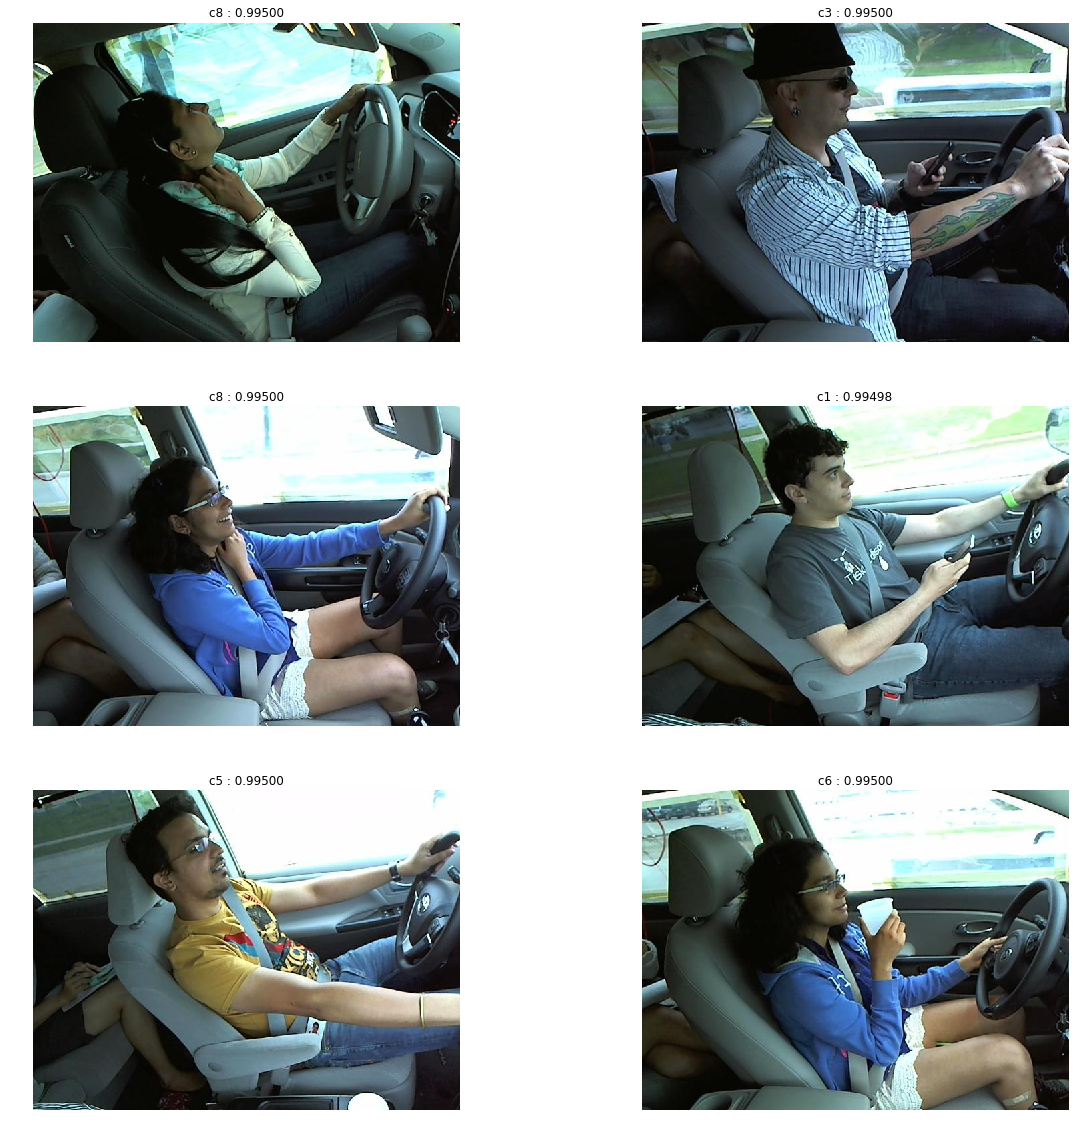

In [52]:
i = 0
plt.figure(figsize=(20,20))
classification = display[col].idxmax(axis=1)
col = ['c'+str(i) for i in range(10)]
for index, row in display.iterrows():
    plt.subplot(3, 2, i+1)
    img_path = "dataset/test/" + row['img']
    img =cv2.imread(img_path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    title = "{} : {:.5f}".format(classification[index], row[col].max())
    plt.title(title)
    plt.axis('off')
    plt.imshow(img)
    i = i + 1